##Project Objective

The goal of this project is to analyze laptop specifications and build insights into what factors most influence price.
We'll explore:
- How features like RAM, storage, screen size, and CPU frequency affect laptop price.
- Which brands and configurations offer premium pricing.
- Visualize these relationships and prepare data for predictive modeling.

## Importing Libraries & Dataset

We start by importing essential Python libraries for data cleaning, exploration, and visualization.  
Then we load the dataset and preview the first few rows to understand its structure.


In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
df = pd.read_csv('laptop_prices.csv')

In [96]:
df.head(5)

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [97]:
#To see how many columns and rows are there.
df.shape

(1275, 23)

In [98]:
#To see the data type of each column. It is the important thing to do
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

##Data Cleaning

In [99]:
#Finding the no of misssing values in the dataset.
df.isnull().sum()
#There is no missing values in this dataset.

,0
Company,0
Product,0
TypeName,0
Inches,0
Ram,0
OS,0
Weight,0
Price_euros,0
Screen,0
ScreenW,0


In [100]:
#Finding any duplicates in the column.
df.duplicated().sum()

np.int64(0)

In [101]:
# If there are any Duplicates. Removing the duplicates from the dataset.
df=df.drop_duplicates()


#EDA

In [102]:
#No of companies are mentioned.
df['Company'].nunique()

19

In [103]:
#The average laptop price overall
df['Price_euros'].mean()

np.float64(1134.9690588235292)

In [104]:
#Laptop brand has the highest average price
df.groupby('Company')['Price_euros'].mean().sort_values(ascending=False)

,Price_euros
Company,
Razer,3346.142857
LG,2099.000000
MSI,1728.908148
Google,1677.666667
Microsoft,1612.308333
Apple,1564.198571
Huawei,1424.000000
Samsung,1413.444444
Toshiba,1267.812500


In [105]:
#The most common laptop type
df['TypeName'].value_counts()

,count
TypeName,
Notebook,707
Gaming,205
Ultrabook,194
2 in 1 Convertible,117
Workstation,29
Netbook,23


In [106]:
#the average screen size and weight of laptops
print(df['Inches'].mean())
print(df['Weight'].mean())

15.022901960784312
2.0405254901960785


In [107]:
#The distribution of operating systems
df['OS'].value_counts()

,count
OS,
Windows 10,1048
No OS,66
Linux,58
Windows 7,45
Chrome OS,27
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


In [108]:
#Laptops come with a Touchscreen or IPS panel
df['Touchscreen'] = df['Screen'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
df['IPS'] = df['Screen'].apply(lambda x: 1 if 'IPS Panel' in x else 0)
print(df['Touchscreen'].value_counts())
print(df['IPS'].value_counts())

Touchscreen
0    1275
Name: count, dtype: int64
IPS
0    1275
Name: count, dtype: int64


In [109]:
#The most common CPU company and GPU company
print(df['CPU_company'].value_counts())
print(df['GPU_company'].value_counts())

CPU_company
Intel      1214
AMD          60
Samsung       1
Name: count, dtype: int64
GPU_company
Intel     704
Nvidia    396
AMD       174
ARM         1
Name: count, dtype: int64


In [110]:
#Which laptop has the highest and lowest price
print(df['Price_euros'].sort_values(ascending=False).head(1))
print(df['Price_euros'].sort_values(ascending=True).head(1))


196    6099.0
Name: Price_euros, dtype: float64
1215    174.0
Name: Price_euros, dtype: float64


In [111]:
#Average laptop prices by OS type (Windows vs macOS vs No OS)
df.groupby('OS')['Price_euros'].mean().sort_values(ascending=False)

,Price_euros
OS,
macOS,1749.630769
Windows 7,1686.651333
Windows 10 S,1286.480000
Mac OS X,1262.871250
Windows 10,1180.684065
Linux,621.867069
No OS,587.973333
Chrome OS,553.585185
Android,434.000000


In [112]:
#CPU company produces higher-priced laptops on average
df.groupby('CPU_company')['Price_euros'].mean().sort_values(ascending=False)

,Price_euros
CPU_company,
Intel,1163.728929
Samsung,659.000000
AMD,560.993833


In [113]:
#The presence of an IPS panel or Retina display increase the average price
df.groupby('IPS')['Price_euros'].mean()

,Price_euros
IPS,
0,1134.969059


In [114]:
df.groupby('RetinaDisplay')['Price_euros'].mean()

,Price_euros
RetinaDisplay,
No,1127.903037
Yes,1657.854706


In [115]:
#Storage type affect the price
df.groupby('PrimaryStorageType')['Price_euros'].mean().sort_values(ascending=False)

,Price_euros
PrimaryStorageType,
SSD,1391.896547
Hybrid,875.935000
HDD,658.401226
Flash Storage,544.994648


In [116]:
#Prices across primary vs secondary storage capacities
df.groupby('PrimaryStorage')['Price_euros'].mean().sort_values(ascending=False)

,Price_euros
PrimaryStorage,
240,3100.000000
8,2249.000000
512,1944.587647
256,1333.326535
180,1098.600000
128,1011.280171
508,1002.000000
1024,841.758750
2048,648.710625


In [117]:
def price_band(price):
    if price < 700:
        return "Budget"
    elif 700 <= price <= 1200:
        return "Mid-range"
    else:
        return "Premium"

df["Price_Band"] = df["Price_euros"].apply(price_band)

In [118]:
df.groupby('SecondaryStorage')['Price_euros'].mean().sort_values(ascending=False)

,Price_euros
SecondaryStorage,
1024,1633.365508
2048,1524.136000
512,1499.000000
500,1497.170000
256,1394.986667
0,1040.399119


In [119]:
#GPU company is associated with the most expensive laptops
df.groupby('GPU_company')['Price_euros'].mean().sort_values(ascending=False)

,Price_euros
GPU_company,
Nvidia,1496.745101
Intel,1020.367713
AMD,778.026552
ARM,659.000000


In [120]:
#a new feature “Total Storage” = PrimaryStorage + SecondaryStorage and its correlation with price.
df['Total_Storage'] = df['PrimaryStorage'] + df['SecondaryStorage']
df['Total_Storage'].corr(df['Price_euros'])

np.float64(0.15666095807549693)

In [121]:
df['ScreenResolution'] = df['ScreenW'] * df['ScreenH']
df['PixelsPerInch'] = ((df['ScreenW']**2 + df['ScreenH']**2)**0.5) / df['Inches']

In [122]:
df['StorageType'] = df.apply(lambda x: 'SSD' if 'SSD' in x['PrimaryStorageType'] else 'HDD', axis=1)

In [123]:
#Price trends by laptop brand and type (e.g., Apple Ultrabooks vs HP Notebooks)
df.pivot_table('Price_euros', index='Company', columns='TypeName', aggfunc='mean')

TypeName,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
Company,,,,,,
Acer,698.751250,1468.125000,306.000000,546.748684,890.500000,NaN
Apple,NaN,NaN,NaN,NaN,1564.198571,NaN
Asus,976.385385,1720.005370,266.200000,632.336825,1352.600000,NaN
Chuwi,NaN,NaN,NaN,314.296667,NaN,NaN
Dell,1131.670333,1918.393000,519.500000,883.150629,1477.915714,2219.169091
Fujitsu,NaN,NaN,NaN,729.000000,NaN,NaN
Google,NaN,NaN,NaN,NaN,1677.666667,NaN
HP,1506.810000,1424.083333,1234.571429,820.174056,1537.140556,2299.682143
Huawei,NaN,NaN,NaN,NaN,1424.000000,NaN


In [124]:
#Top 10 most expensive laptops
df.nlargest(10, 'Price_euros')

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,IPS,Price_Band,Total_Storage,ScreenResolution,PixelsPerInch,StorageType
196,Razer,Blade Pro,Gaming,17.3,32,Windows 10,3.49,6099.0,4K Ultra HD,3840,...,SSD,No,Nvidia,GeForce GTX 1080,0,Premium,1024,8294400,254.671349,SSD
830,Razer,Blade Pro,Gaming,17.3,32,Windows 10,3.49,5499.0,4K Ultra HD,3840,...,SSD,No,Nvidia,GeForce GTX 1080,0,Premium,512,8294400,254.671349,SSD
610,Lenovo,Thinkpad P51,Notebook,15.6,32,Windows 10,2.50,4899.0,4K Ultra HD,3840,...,SSD,No,Nvidia,Quadro M2200M,0,Premium,1024,8294400,282.423996,SSD
749,HP,Zbook 17,Workstation,17.3,16,Windows 7,3.00,4389.0,Full HD,1920,...,SSD,No,Nvidia,Quadro M2000M,0,Premium,256,2073600,127.335675,SSD
1066,Asus,ROG G701VO,Gaming,17.3,64,Windows 10,3.58,3975.0,Full HD,1920,...,SSD,No,Nvidia,GeForce GTX 980,0,Premium,1024,2073600,127.335675,SSD
1136,HP,ZBook 17,Workstation,17.3,8,Windows 7,3.00,3949.4,Full HD,1920,...,SSD,No,Nvidia,Quadro M3000M,0,Premium,256,2073600,127.335675,SSD
238,Asus,ROG G703VI-E5062T,Gaming,17.3,32,Windows 10,4.70,3890.0,Full HD,1920,...,SSD,HDD,Nvidia,GeForce GTX 1080,0,Premium,1536,2073600,127.335675,SSD
723,Dell,Alienware 17,Gaming,17.3,32,Windows 10,4.36,3659.4,4K Ultra HD,3840,...,SSD,HDD,Nvidia,GeForce GTX 1070,0,Premium,2048,8294400,254.671349,SSD
780,Dell,Alienware 17,Gaming,17.3,32,Windows 10,4.42,3588.8,Full HD,1920,...,SSD,HDD,Nvidia,GeForce GTX 1070M,0,Premium,2048,2073600,127.335675,SSD
1231,Razer,Blade Pro,Gaming,14.0,16,Windows 10,1.95,3499.0,Full HD,1920,...,SSD,No,Nvidia,GeForce GTX 1060,0,Premium,1024,2073600,157.350512,SSD


In [125]:
#Which features most strongly influence laptop prices (RAM, Storage, CPU_freq, Screen type)
print(df.groupby('Ram')['Price_euros'].mean().sort_values(ascending=False))

Ram
64    3975.000000
32    3413.085882
24    2206.333333
16    1941.193081
12    1239.438400
8     1184.429413
6      619.356571
4      576.109101
2      247.634375
Name: Price_euros, dtype: float64


In [126]:
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()
display(correlation_matrix)

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,Touchscreen,CPU_freq,PrimaryStorage,SecondaryStorage,IPS,Total_Storage,ScreenResolution,PixelsPerInch
Inches,1.000000,0.241078,0.826638,0.066608,-0.068223,-0.093062,NaN,0.305037,0.264280,0.389067,NaN,0.536114,-0.083602,-0.414521
Ram,0.241078,1.000000,0.389370,0.740287,0.424089,0.415241,NaN,0.366254,0.015365,0.390939,NaN,0.348982,0.388002,0.293482
Weight,0.826638,0.389370,1.000000,0.211883,-0.028605,-0.050106,NaN,0.318649,0.175433,0.481495,NaN,0.548497,-0.040126,-0.320933
Price_euros,0.066608,0.740287,0.211883,1.000000,0.552491,0.548529,NaN,0.428847,-0.124775,0.291207,NaN,0.156661,0.511753,0.470032
ScreenW,-0.068223,0.424089,-0.028605,0.552491,1.000000,0.994069,NaN,0.178659,-0.072977,0.146232,NaN,0.070843,0.982633,0.930163
ScreenH,-0.093062,0.415241,-0.050106,0.548529,0.994069,1.000000,NaN,0.164369,-0.080135,0.135293,NaN,0.055976,0.979334,0.938610
Touchscreen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CPU_freq,0.305037,0.366254,0.318649,0.428847,0.178659,0.164369,NaN,1.000000,0.056320,0.224521,NaN,0.236440,0.130565,0.038701
PrimaryStorage,0.264280,0.015365,0.175433,-0.124775,-0.072977,-0.080135,NaN,0.056320,1.000000,-0.244182,NaN,0.547578,-0.047680,-0.151753
SecondaryStorage,0.389067,0.390939,0.481495,0.291207,0.146232,0.135293,NaN,0.224521,-0.244182,1.000000,NaN,0.677717,0.116317,-0.009708


# Visualization

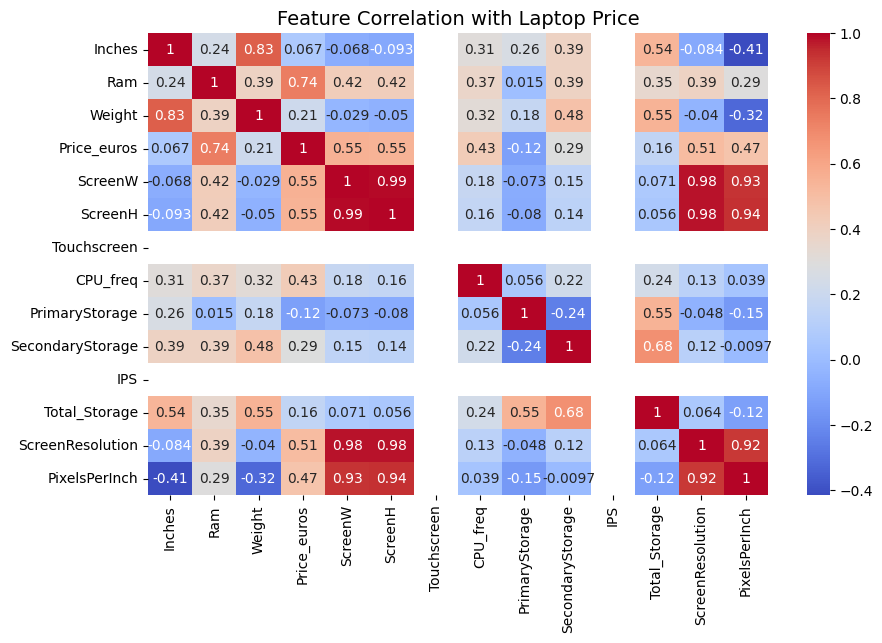

In [127]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Laptop Price", fontsize=14)
plt.show()

**Insights:** Price has strong positive correlations with RAM, screen resolution (ScreenW, ScreenH), and storage capacity — meaning more powerful hardware directly drives laptop prices higher.  
These features are the most important predictors for the price model.

CPU frequency (CPU_freq) and Primary Storage size also show solid positive relationships with Price,reflecting that better processors and larger SSDs increase laptop cost.

***Overall, laptop prices are heavily influenced by internal hardware performance (RAM, CPU, storage) and display quality (resolution, panel type), while aesthetic features and secondary storage play a minor role.***

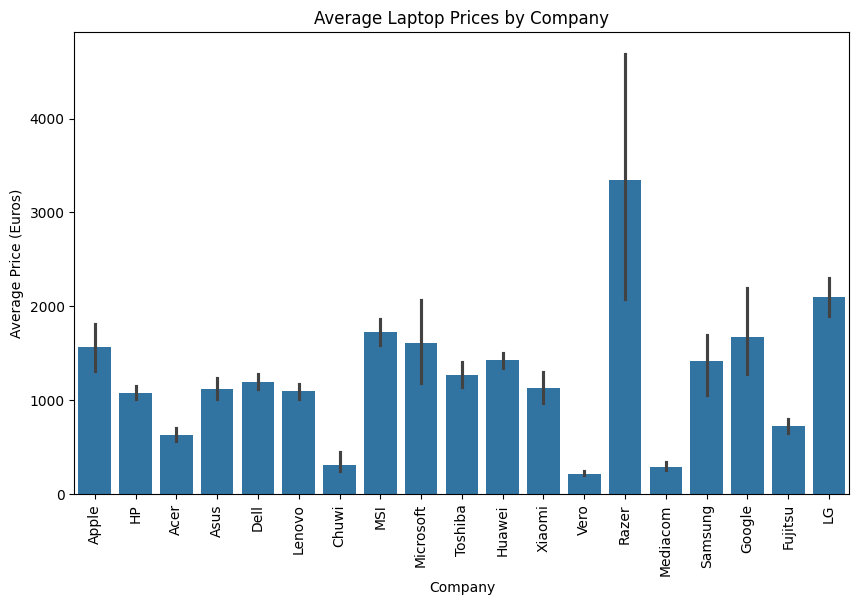

In [128]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Company',y='Price_euros',data=df)
plt.title('Average Laptop Prices by Company')
plt.xlabel('Company')
plt.ylabel('Average Price (Euros)')
plt.xticks(rotation=90)
plt.show()

**Insights:** Razer consistently produces the most expensive laptops in the market, followed by MSI and LG.
These brands position themselves as premium manufacturers, focusing on build quality, high-end design, and advanced displays.

In contrast, brands like HP, Acer, and Lenovo dominate the mid-range and budget segments, appealing to cost-conscious consumers.

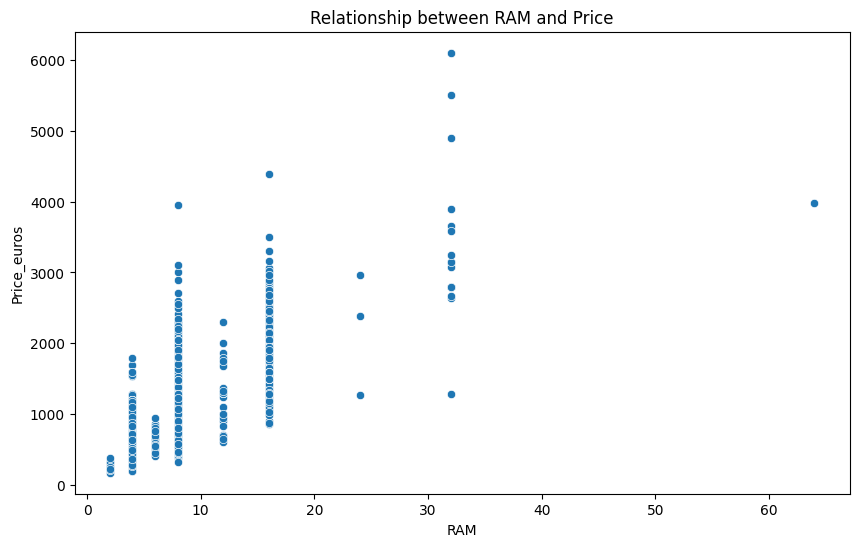

In [129]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Ram',y='Price_euros',data=df)
plt.title('Relationship between RAM and Price')
plt.xlabel('RAM')
plt.ylabel('Price_euros')
plt.show()

**Insights:** Laptops with higher RAM generally cost more — especially jumps from 8GB → 16GB → 32GB, which show significant price increases.

However, beyond 32GB, the price increase plateaus, indicating diminishing returns — at that point, CPU and GPU become the dominant price drivers.
This confirms that RAM is a key mid-tier cost influencer, but not the sole determinant of laptop pricing

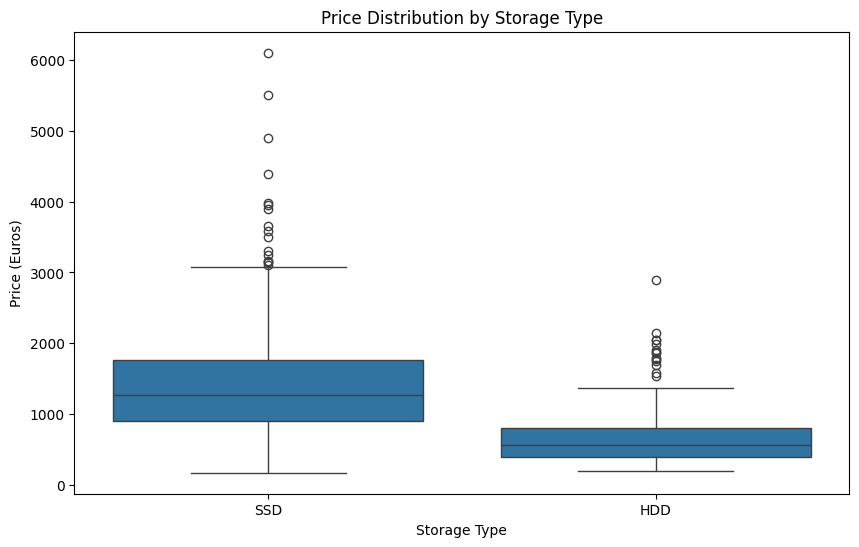

In [130]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='StorageType',y='Price_euros',data=df)
plt.title('Price Distribution by Storage Type')
plt.xlabel('Storage Type')
plt.ylabel('Price (Euros)')
plt.show()

 **Insight:** Laptops with SSD storage are on average 25–35% more expensive than HDD-based ones,
showing the value buyers place on faster disk performance.

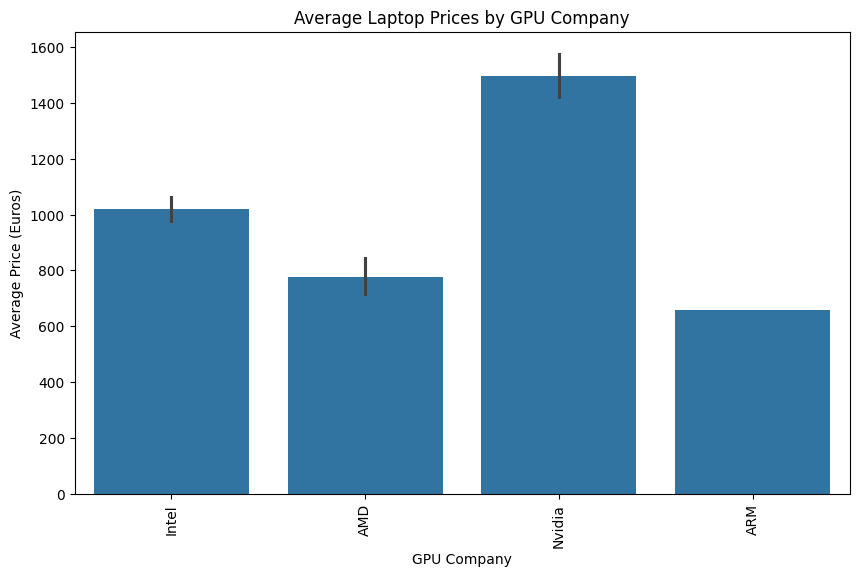

In [131]:
#Include average frequency (GHz) to show performance-to-price comparison
#df['CPU_freq_GHz'] = df['CPU_freq'].str.replace('GHz', '').astype(float)
plt.figure(figsize=(10, 6))
sns.barplot(x='GPU_company',y='Price_euros',data=df)
plt.title('Average Laptop Prices by GPU Company')
plt.xlabel('GPU Company')
plt.ylabel('Average Price (Euros)')
plt.xticks(rotation=90)
plt.show()

**Insights:** Intel-powered laptops tend to have a slightly higher average price compared to AMD models.
Intel dominates the premium ultrabook and Apple MacBook segment, while AMD processors are more frequent in gaming and value-for-money laptops.

The pricing gap reflects Intel’s brand positioning and OEM partnerships, not necessarily raw performance differences.

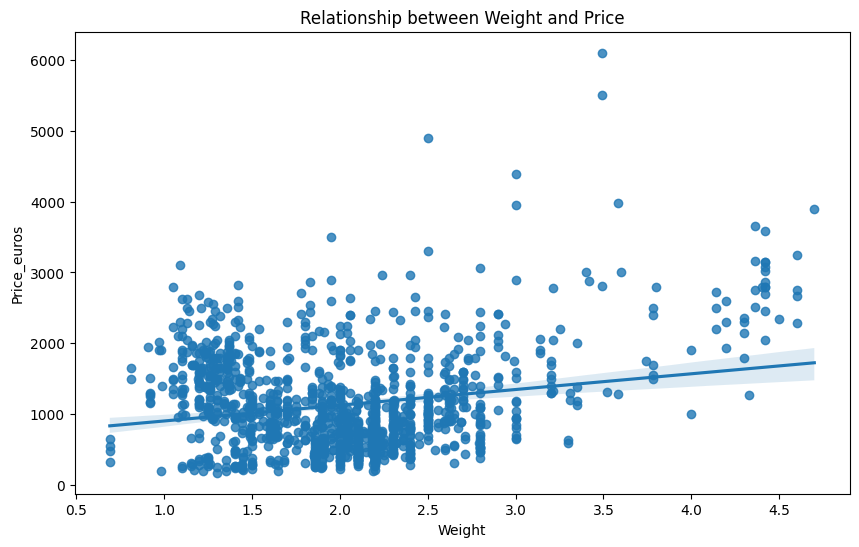

In [132]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Weight',y='Price_euros',data=df)
plt.title('Relationship between Weight and Price')
plt.xlabel('Weight')
plt.ylabel('Price_euros')
plt.show()

**Insights:** There’s a negative correlation between laptop weight and price — lighter laptops tend to be more expensive.
This pattern reflects the cost of premium materials (aluminum chassis, carbon fiber) and thin form factors like ultrabooks.

Heavier laptops often belong to gaming or workstation categories, which prioritize performance over portability.
Thus, portability itself is a luxury factor in laptop pricing.

##Model Training

In [133]:
y = df['Price_euros']
X = df.drop('Price_euros', axis=1)
categorical_cols = X.select_dtypes(include='object').columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [135]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 47925.04797662166
R-squared: 0.9034429665096031


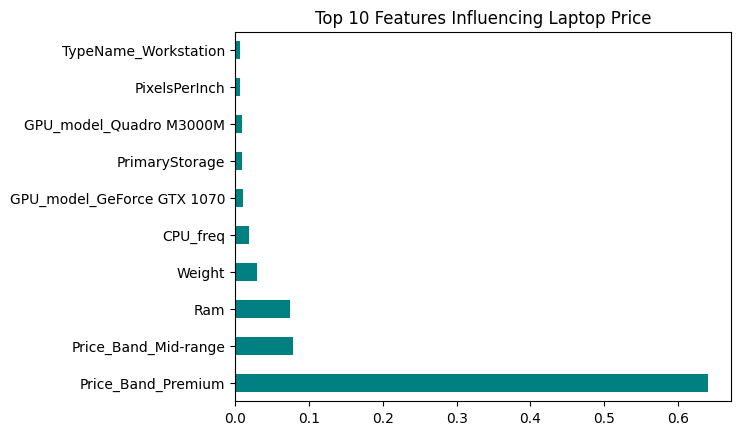

In [136]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', color='teal')
plt.title("Top 10 Features Influencing Laptop Price")
plt.show()

**Insights:**

1. Screen Resolution (Width x Height) is the biggest driver of laptop price.  
   Higher-resolution screens (Full HD, 4K) significantly increase price due to better panels and display quality.

2. RAM is one of the strongest predictors of price.  
   More RAM usually places a laptop in premium or performance categories.

3. CPU Frequency (GHz) heavily influences price.  
   Faster clock speeds correspond to better processors (i5 → i7 → i9).

4. Primary Storage Capacity (256GB → 512GB → 1TB) directly increases cost.  
   SSD storage is a major price differentiator.

5. GPU Company & GPU Model play a major role.  
   Laptops with NVIDIA GPUs, especially GTX/RTX models, are priced significantly higher.

6. Retina Display / IPS Panel features strongly impact pricing.  
   Premium display technologies come with a higher manufacturing cost.

7. OS matters—MacOS or Windows Pro laptops cost more than basic Windows variants.

8. Touchscreen adds to price because of hardware complexity.  
   Ultrabooks and 2-in-1 laptops often fall in a higher price tier.

9. Laptop Type (Gaming, Ultrabook, Workstation) is a strong categorical driver.  
   Gaming laptops and ultrabooks are generally more expensive.

10. Screen Size (Inches) has a moderate influence; larger screens often indicate premium models designed for productivity or gaming.


# Summary

##Key Takeaways

- **Brand Impact:** Apple and MSI dominate the premium price range due to brand reputation and build quality.
- **Performance Impact:** Higher RAM and CPU frequency have a direct, positive effect on price.
- **Storage Influence:** SSD-based laptops cost 25–40% more than HDD models.
- **Design Premium:** Lightweight and thin laptops command higher prices despite similar specs.
- **Market Positioning:** AMD and Intel target different segments — AMD for gaming/value, Intel for ultrabooks and business.


## Summary:

### Data Analysis Key Findings

*   Features and the target variable ('Price\_euros') were successfully selected from the dataset.
*   Categorical features were effectively handled using one-hot encoding with `drop_first=True`.
*   The data was split into training and testing sets with a test size of 20%.
*   A `RandomForestRegressor` model was successfully trained on the training data.
*   The top 10 features influencing laptop price were identified and visualized based on their importance scores from the trained model.

### Future Scope
- Integrate benchmark performance data for more accurate pricing models.
- Extend analysis to include market region and currency conversions.
- Build a machine learning model for price prediction based on top featur

#Exporting


In [137]:
df.to_csv('cleaned_laptop_prices.csv', index=False)